# Functions and imports

Imports and the functions that call the HI-VAE, modified from the paper version only to allow inputting s_codes and z_codes manually.

In [21]:
import time
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import os
import re
import pandas as pd
import numpy as np
from IPython.display import Audio
import seaborn as sns

import helpers # this is where the main training/decoding functions are, modified from teh original HIVAE main.py

#import warnings 
#warnings.filterwarnings('ignore') ########## NOTE: comment out for testing in case it's hiding problems

def set_settings(opts,nepochs=500,modload=False,save=True): # note: modload doesnt do anything right now, hardcoded in helpers.py
    'replace setting template placeholders with file info'
    inputf=re.sub('.csv','',opts['files'].iloc[0])
    #missf=inputf+'_missing.csv'
    typef=inputf+'_types.csv'
    
    template = '--epochs NEPOCHS --model_name model_HIVAE_inputDropout --restore MODLOAD \
        --data_file data_python_NotMissing/INPUT_FILE.csv --types_file data_python_NotMissing/TYPES_FILE \
         --batch_size NBATCH --save NEPFILL --save_file SAVE_FILE\
        --dim_latent_s SDIM --dim_latent_z 1 --dim_latent_y YDIM \
        --learning_rate LRATE'
    
    # replace placeholders in template
    settings = re.sub('INPUT_FILE',inputf,template)
    settings = re.sub('NBATCH',str(opts['nbatch'].iloc[0]),settings)
    settings = re.sub('NEPOCHS',str(nepochs),settings)
    settings = re.sub('NEPFILL',str(nepochs-1),settings) if save else re.sub('NEPFILL',str(nepochs*2),settings)
    settings = re.sub('YDIM',str(opts['ydims'].iloc[0]),settings)
    settings = re.sub('SDIM',str(opts['sdims'].iloc[0]),settings)
    #settings = re.sub('MISS_FILE',missf,settings) #if not 'medhist' in inputf else re.sub('--true_miss_file data_python/MISS_FILE','',settings)
    settings = re.sub('TYPES_FILE',typef,settings)
    settings = re.sub('SAVE_FILE',inputf,settings)
    settings = re.sub('LRATE',str(opts['lrates'].iloc[0]),settings)
    settings = re.sub('MODLOAD','1',settings) if modload else re.sub('MODLOAD','0',settings)
    
    return settings

In [22]:
os.getcwd()

'/Users/meemansasood/Documents/Documents_IT/ADNIVAMBN_paper_all/VAMBNForADNI/data/HI-VAE'

In [23]:
# get file list
files=[i for i in os.listdir('data_python_NotMissing/') if not '_type' in i and not '_missing' in i and not '.DS_Store' in i and not 'stalone' in i]
files.sort()
print(files)

['MMSE_Attention_Concentration_VIS1.csv', 'MMSE_Language_VIS1.csv', 'MMSE_Memory_Recall_VIS1.csv', 'MMSE_Orientation_VIS1.csv', 'MMSE_Working_Memory_Registration_VIS1.csv']


In [24]:
file = pd.read_csv('data_python_NotMissing/' + files[1], header=None)

In [25]:
best_hyper = pd.read_csv('results_ADNI_nm.csv', sep = ',')
best_hyper = best_hyper.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
best_hyper.files = best_hyper.files.str.replace('\\_grid.*?\\_results\\_NotMissing', '')
best_hyper = best_hyper[best_hyper.files.isin(files)]
best_hyper = best_hyper.reset_index(drop=True)
best_hyper

/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,loss,lrates,nbatch,wdecay,ydims,files
0,0.822020,0.001,32.0,0.000,1.0,MMSE_Language_VIS1.csv
1,0.575540,0.001,32.0,0.000,1.0,MMSE_Attention_Concentration_VIS1.csv
2,0.070693,0.001,16.0,0.001,1.0,MMSE_Working_Memory_Registration_VIS1.csv
3,1.285093,0.001,32.0,0.000,1.0,MMSE_Orientation_VIS1.csv
4,1.229906,0.010,16.0,0.000,1.0,MMSE_Memory_Recall_VIS1.csv


In [26]:
sample_size= len(file)
# get file list
files=[i for i in os.listdir('data_python_Notmissing/') if not '_type' in i and not '_missing' in i and not '.DS_Store' in i and not 'stalone' in i]
files.sort()
best_hyper = best_hyper.sort_values('files')
best_hyper = best_hyper.reset_index(drop=True)
mmse_att_conc = [1]
mmse_language = [2]
mmse_mem_recall = [2]
mmse_orientation = [2]
mmse_work_mem_reg = [1]

sds = mmse_att_conc+mmse_language+mmse_mem_recall+mmse_orientation+mmse_work_mem_reg
sdims=dict(zip(files,sds))
if any(files!=best_hyper['files']):
    print('ERROR')
else:
    best_hyper['sdims']=sds


best_hyper['nbatch']= best_hyper['nbatch'].astype(int)
best_hyper['ydims']= best_hyper['ydims'].astype(int)
best_hyper['sdims']= best_hyper['sdims'].astype(int)
best_hyper

,loss,lrates,nbatch,wdecay,ydims,files,sdims
0,0.575540,0.001,32,0.000,1,MMSE_Attention_Concentration_VIS1.csv,1
1,0.822020,0.001,32,0.000,1,MMSE_Language_VIS1.csv,2
2,1.229906,0.010,16,0.000,1,MMSE_Memory_Recall_VIS1.csv,2
3,1.285093,0.001,32,0.000,1,MMSE_Orientation_VIS1.csv,2
4,0.070693,0.001,16,0.001,1,MMSE_Working_Memory_Registration_VIS1.csv,1


In [27]:
best_hyper.to_csv('best_hyper_ADNI_processed_nm.csv', index=False)

In [28]:
os.getcwd()

'/Users/meemansasood/Documents/Documents_IT/ADNIVAMBN_paper_all/VAMBNForADNI/data/HI-VAE'

# General settings

sds is info about which files have what dimension of the "s_codes", that determine the number of mixture components in the "zcodes", our continuous embeddings used in the Bayes Net

# Training

Namespace(batch_size=32, data_file='data_python_NotMissing/MMSE_Attention_Concentration_VIS1.csv', dim_latent_s=1, dim_latent_y=1, dim_latent_y_partition=None, dim_latent_z=1, display=1, epochs=500, learning_rate=0.001, miss_file='Missing_test.csv', miss_percentage_test=0.0, miss_percentage_train=0.0, model_name='model_HIVAE_inputDropout', perp=10, plot=1, restore=0, save=499, save_file='MMSE_Attention_Concentration_VIS1', true_miss_file=None, types_file='data_python_NotMissing/MMSE_Attention_Concentration_VIS1_types.csv')
[*] Importing model: model_HIVAE_inputDropout
[*] Defining placeholders
[*] Defining Encoder...
[*] Defining Decoder...
[*] Defining Cost function...
Initizalizing Variables ...
1.0
Epoch: 0 Rec. Loss: -3.3235075738694935 KL s: 0.0 KL z: 0.00018916440506776174
Saving Variables ... ./Saved_Networks/MMSE_Attention_Concentration_VIS1/MMSE_Attention_Concentration_VIS1.ckpt
0.99778
Epoch: 1 Rec. Loss: -3.166745493147108 KL s: 0.0 KL z: 0.00019235283964210087
0.99556
Epoch

Epoch: 91 Rec. Loss: -0.5574464248286353 KL s: 0.0 KL z: 0.05734784685903126
0.79576
Epoch: 92 Rec. Loss: -0.5614479723903868 KL s: 0.0 KL z: 0.05550683343576061
0.79354
Epoch: 93 Rec. Loss: -0.5576411214139726 KL s: 0.0 KL z: 0.056039205317695934
0.79132
Epoch: 94 Rec. Loss: -0.5717874096499549 KL s: 0.0 KL z: 0.055843159101075596
0.7891
Epoch: 95 Rec. Loss: -0.5578810860713322 KL s: 0.0 KL z: 0.05623184951643149
0.78688
Epoch: 96 Rec. Loss: -0.5712854835722182 KL s: 0.0 KL z: 0.05552758181260692
0.7846599999999999
Epoch: 97 Rec. Loss: -0.559346733490626 KL s: 0.0 KL z: 0.055582614946696494
0.78244
Epoch: 98 Rec. Loss: -0.558426723877589 KL s: 0.0 KL z: 0.05547539099223084
0.7802199999999999
Epoch: 99 Rec. Loss: -0.5591413666804631 KL s: 0.0 KL z: 0.05397138777706358
0.778
Epoch: 100 Rec. Loss: -0.5733277704980638 KL s: 0.0 KL z: 0.05468800531493293
0.7757799999999999
Epoch: 101 Rec. Loss: -0.5585966649982664 KL s: 0.0 KL z: 0.05388282082147068
0.77356
Epoch: 102 Rec. Loss: -0.5582489

Epoch: 182 Rec. Loss: -0.568157555659612 KL s: 0.0 KL z: 0.0433334621704287
0.5937399999999999
Epoch: 183 Rec. Loss: -0.5662067313989003 KL s: 0.0 KL z: 0.043405391938156554
0.59152
Epoch: 184 Rec. Loss: -0.5695557117462158 KL s: 0.0 KL z: 0.043517082350121604
0.5892999999999999
Epoch: 185 Rec. Loss: -0.5709639118777381 KL s: 0.0 KL z: 0.042988011986017226
0.58708
Epoch: 186 Rec. Loss: -0.5791478719976213 KL s: 0.0 KL z: 0.04334499761462211
0.5848599999999999
Epoch: 187 Rec. Loss: -0.5597752180364397 KL s: 0.0 KL z: 0.04273209592534436
0.58264
Epoch: 188 Rec. Loss: -0.5739222612645891 KL s: 0.0 KL z: 0.04291242390043205
0.5804199999999999
Epoch: 189 Rec. Loss: -0.5615195088916355 KL s: 0.0 KL z: 0.04295578818354342
0.5782
Epoch: 190 Rec. Loss: -0.5687041756179597 KL s: 0.0 KL z: 0.04205361894435353
0.5759799999999999
Epoch: 191 Rec. Loss: -0.5733765999476115 KL s: 0.0 KL z: 0.043139984417292804
0.5737599999999999
Epoch: 192 Rec. Loss: -0.5718605313036177 KL s: 0.0 KL z: 0.0422281618333

Epoch: 270 Rec. Loss: -0.5660714434252845 KL s: 0.0 KL z: 0.03600265656908353
0.39837999999999996
Epoch: 271 Rec. Loss: -0.5838080313470628 KL s: 0.0 KL z: 0.03606510601109929
0.39615999999999996
Epoch: 272 Rec. Loss: -0.5651590565840403 KL s: 0.0 KL z: 0.035633463660875955
0.39393999999999996
Epoch: 273 Rec. Loss: -0.5791183624002668 KL s: 0.0 KL z: 0.03573989267978403
0.39171999999999996
Epoch: 274 Rec. Loss: -0.560369649860594 KL s: 0.0 KL z: 0.035774361880289186
0.38949999999999996
Epoch: 275 Rec. Loss: -0.5817605038483937 KL s: 0.0 KL z: 0.03580678349567784
0.38727999999999996
Epoch: 276 Rec. Loss: -0.5843867447641161 KL s: 0.0 KL z: 0.03719483899573485
0.38505999999999996
Epoch: 277 Rec. Loss: -0.5736902952194214 KL s: 0.0 KL z: 0.03648542823890845
0.38283999999999996
Epoch: 278 Rec. Loss: -0.5785216818253199 KL s: 0.0 KL z: 0.036470642727282315
0.38061999999999996
Epoch: 279 Rec. Loss: -0.5650988154941134 KL s: 0.0 KL z: 0.03654534059266249
0.37839999999999996
Epoch: 280 Rec. Lo

Epoch: 354 Rec. Loss: -0.5687196953429117 KL s: 0.0 KL z: 0.034242081766327225
0.21189999999999998
Epoch: 355 Rec. Loss: -0.560878007279502 KL s: 0.0 KL z: 0.03421519423524539
0.20967999999999998
Epoch: 356 Rec. Loss: -0.5800331562757493 KL s: 0.0 KL z: 0.03440833108292685
0.20745999999999998
Epoch: 357 Rec. Loss: -0.5655700974994236 KL s: 0.0 KL z: 0.033529015216562486
0.20523999999999998
Epoch: 358 Rec. Loss: -0.5752907309267256 KL s: 0.0 KL z: 0.034438062500622535
0.20301999999999998
Epoch: 359 Rec. Loss: -0.5748465173774295 KL s: 0.0 KL z: 0.03428770274751716
0.20079999999999998
Epoch: 360 Rec. Loss: -0.5833382507165273 KL s: 0.0 KL z: 0.03397802499433358
0.19857999999999998
Epoch: 361 Rec. Loss: -0.5636698524157207 KL s: 0.0 KL z: 0.033617614747749436
0.19635999999999998
Epoch: 362 Rec. Loss: -0.5722565889358521 KL s: 0.0 KL z: 0.03450544103980065
0.19413999999999998
Epoch: 363 Rec. Loss: -0.5746842443943023 KL s: 0.0 KL z: 0.03357853065762255
0.19191999999999998
Epoch: 364 Rec. L

Epoch: 441 Rec. Loss: -0.578302976489067 KL s: 0.0 KL z: 0.03198964566820198
0.018759999999999888
Epoch: 442 Rec. Loss: -0.5653770244783826 KL s: 0.0 KL z: 0.03185234140190813
0.016539999999999888
Epoch: 443 Rec. Loss: -0.573311118947135 KL s: 0.0 KL z: 0.031031960000594456
0.014319999999999888
Epoch: 444 Rec. Loss: -0.5959861344761319 KL s: 0.0 KL z: 0.0322261043306854
0.012099999999999889
Epoch: 445 Rec. Loss: -0.5811288757456674 KL s: 0.0 KL z: 0.03216472276382976
0.009879999999999889
Epoch: 446 Rec. Loss: -0.5770934015512467 KL s: 0.0 KL z: 0.0320144304798709
0.007659999999999889
Epoch: 447 Rec. Loss: -0.5700663155979581 KL s: 0.0 KL z: 0.031091748881671162
0.005439999999999889
Epoch: 448 Rec. Loss: -0.5842899209923215 KL s: 0.0 KL z: 0.031910690541068716
0.0032199999999998896
Epoch: 449 Rec. Loss: -0.5766532858212788 KL s: 0.0 KL z: 0.03161232380403413
0.001
Epoch: 450 Rec. Loss: -0.5760775420400831 KL s: 0.0 KL z: 0.03125526536669996
0.001
Epoch: 451 Rec. Loss: -0.578867681821187

Epoch: 26 Rec. Loss: -0.8349644051657783 KL s: 0.3892583886782328 KL z: 0.04661350374420484
0.94006
Epoch: 27 Rec. Loss: -0.8121374600463444 KL s: 0.39034979542096454 KL z: 0.045766257618864374
0.93784
Epoch: 28 Rec. Loss: -0.804510153664483 KL s: 0.3967961781554752 KL z: 0.04920840503440963
0.93562
Epoch: 29 Rec. Loss: -0.7994273795021904 KL s: 0.40929583377308315 KL z: 0.04698539098931683
0.9334
Epoch: 30 Rec. Loss: -0.7738327754868402 KL s: 0.4162346045176188 KL z: 0.04808329844640361
0.93118
Epoch: 31 Rec. Loss: -0.781384766764111 KL s: 0.42639911903275385 KL z: 0.048742150225573114
0.92896
Epoch: 32 Rec. Loss: -0.7589778118663364 KL s: 0.4358900242381626 KL z: 0.04868916649785307
0.92674
Epoch: 33 Rec. Loss: -0.7390546533796523 KL s: 0.44455091423458526 KL z: 0.0476785777343644
0.92452
Epoch: 34 Rec. Loss: -0.7329024685753717 KL s: 0.4531089696619246 KL z: 0.04623967715435558
0.9223
Epoch: 35 Rec. Loss: -0.7293431440989177 KL s: 0.46078480548328826 KL z: 0.04865791400273641
0.9200

Epoch: 111 Rec. Loss: -0.27004085348712076 KL s: 0.6591863499747382 KL z: 0.06204140732685725
0.75136
Epoch: 112 Rec. Loss: -0.2651608794927597 KL s: 0.6599194765090942 KL z: 0.06327374163601134
0.7491399999999999
Epoch: 113 Rec. Loss: -0.2761758052640491 KL s: 0.6604796316888597 KL z: 0.06528071429994371
0.74692
Epoch: 114 Rec. Loss: -0.27329715142647426 KL s: 0.6611054963535733 KL z: 0.06620496892266803
0.7446999999999999
Epoch: 115 Rec. Loss: -0.2444558072421286 KL s: 0.6614030109511482 KL z: 0.06403226268788179
0.74248
Epoch: 116 Rec. Loss: -0.2506971716880798 KL s: 0.6613882528411017 KL z: 0.06258503906428814
0.7402599999999999
Epoch: 117 Rec. Loss: -0.2569245356652472 KL s: 0.6619569116168552 KL z: 0.06865371126267646
0.73804
Epoch: 118 Rec. Loss: -0.24548569685882993 KL s: 0.662943779097663 KL z: 0.06571755533417066
0.7358199999999999
Epoch: 119 Rec. Loss: -0.24197298304902182 KL s: 0.663218206829495 KL z: 0.0652718622237444
0.7336
Epoch: 120 Rec. Loss: -0.2485693719651964 KL s:

Epoch: 191 Rec. Loss: -0.18130721284283532 KL s: 0.6794698397318523 KL z: 0.07864751724733246
0.5737599999999999
Epoch: 192 Rec. Loss: -0.17170075004299482 KL s: 0.6796147757106357 KL z: 0.07766933461858166
0.5715399999999999
Epoch: 193 Rec. Loss: -0.16409932921330134 KL s: 0.679756764570872 KL z: 0.07695233312745889
0.5693199999999999
Epoch: 194 Rec. Loss: -0.17210922348830435 KL s: 0.6798789885309008 KL z: 0.07742800162070328
0.5670999999999999
Epoch: 195 Rec. Loss: -0.16274489429261949 KL s: 0.6798553850915697 KL z: 0.07235099900927809
0.5648799999999999
Epoch: 196 Rec. Loss: -0.17218659727109803 KL s: 0.6801144864824084 KL z: 0.0779085966034068
0.5626599999999999
Epoch: 197 Rec. Loss: -0.1719703983929422 KL s: 0.6803505937258403 KL z: 0.0759200652440389
0.5604399999999999
Epoch: 198 Rec. Loss: -0.1794238140185674 KL s: 0.6804812007480198 KL z: 0.08181523030830753
0.5582199999999999
Epoch: 199 Rec. Loss: -0.1614520114329126 KL s: 0.6806424140930176 KL z: 0.07548551716738278
0.555999

Epoch: 267 Rec. Loss: -0.14279826142721705 KL s: 0.685058515601688 KL z: 0.07942274523278077
0.40503999999999996
Epoch: 268 Rec. Loss: -0.15240754435459772 KL s: 0.6850846966107687 KL z: 0.08152719678150283
0.40281999999999996
Epoch: 269 Rec. Loss: -0.1571145010077291 KL s: 0.6851273629400465 KL z: 0.08099708946214781
0.40059999999999996
Epoch: 270 Rec. Loss: -0.1564696657160918 KL s: 0.6851927836736044 KL z: 0.08445812736948331
0.39837999999999996
Epoch: 271 Rec. Loss: -0.14278493051727612 KL s: 0.6852450595961677 KL z: 0.08280301731493737
0.39615999999999996
Epoch: 272 Rec. Loss: -0.16302942153480318 KL s: 0.6852895869149103 KL z: 0.08806890034013325
0.39393999999999996
Epoch: 273 Rec. Loss: -0.15117068845364784 KL s: 0.6853075557284884 KL z: 0.08306443939606349
0.39171999999999996
Epoch: 274 Rec. Loss: -0.1549390200111601 KL s: 0.6852931724654303 KL z: 0.08164387916525205
0.38949999999999996
Epoch: 275 Rec. Loss: -0.14207893460989 KL s: 0.6852823522355821 KL z: 0.08140423128174411
0

Epoch: 343 Rec. Loss: -0.14787811123662525 KL s: 0.6875021470917596 KL z: 0.08215372094677555
0.23631999999999997
Epoch: 344 Rec. Loss: -0.1547882964213689 KL s: 0.6873926533593072 KL z: 0.08265196320911249
0.23409999999999997
Epoch: 345 Rec. Loss: -0.15552983714474572 KL s: 0.6873289333449469 KL z: 0.08420035760435793
0.23187999999999998
Epoch: 346 Rec. Loss: -0.13554696101281377 KL s: 0.6871687942081027 KL z: 0.08438332556850381
0.22965999999999998
Epoch: 347 Rec. Loss: -0.14538533223999872 KL s: 0.6872315658463373 KL z: 0.08065764353507095
0.22743999999999998
Epoch: 348 Rec. Loss: -0.14978500944044854 KL s: 0.6870118538538615 KL z: 0.08379596513178614
0.22521999999999998
Epoch: 349 Rec. Loss: -0.1532448230104314 KL s: 0.6868146419525146 KL z: 0.08158915845884217
0.22299999999999998
Epoch: 350 Rec. Loss: -0.13785338232086763 KL s: 0.6867504874865215 KL z: 0.08237338736653328
0.22077999999999998
Epoch: 351 Rec. Loss: -0.1348719550917546 KL s: 0.6871991594632466 KL z: 0.081048912058273

Epoch: 419 Rec. Loss: -0.12412310557232963 KL s: 0.6888017018636068 KL z: 0.08178526577022341
0.06759999999999988
Epoch: 420 Rec. Loss: -0.15222228326731257 KL s: 0.6888062662548489 KL z: 0.08015619756446944
0.06537999999999988
Epoch: 421 Rec. Loss: -0.14299874587191475 KL s: 0.6888032793998718 KL z: 0.08241041940119531
0.06315999999999988
Epoch: 422 Rec. Loss: -0.1352196259631051 KL s: 0.6888032727771335 KL z: 0.08118890412151814
0.06093999999999988
Epoch: 423 Rec. Loss: -0.15036885912219683 KL s: 0.6888032688034905 KL z: 0.0793858493367831
0.05871999999999988
Epoch: 424 Rec. Loss: -0.14454946683512793 KL s: 0.6888047840860155 KL z: 0.0822507645520899
0.056499999999999884
Epoch: 425 Rec. Loss: -0.14090834144088957 KL s: 0.6888062993685404 KL z: 0.08213854423827595
0.054279999999999884
Epoch: 426 Rec. Loss: -0.13947959860993756 KL s: 0.6888048211733501 KL z: 0.07865906800660823
0.052059999999999884
Epoch: 427 Rec. Loss: -0.15310649772485097 KL s: 0.6888033032417298 KL z: 0.079236618470

Epoch: 499 Rec. Loss: -0.14453776143491268 KL s: 0.6887361592716641 KL z: 0.08024807543390328
Saving Variables ... ./Saved_Networks/MMSE_Language_VIS1/MMSE_Language_VIS1.ckpt
Training Finished ...
Namespace(batch_size=16, data_file='data_python_NotMissing/MMSE_Memory_Recall_VIS1.csv', dim_latent_s=2, dim_latent_y=1, dim_latent_y_partition=None, dim_latent_z=1, display=1, epochs=500, learning_rate=0.01, miss_file='Missing_test.csv', miss_percentage_test=0.0, miss_percentage_train=0.0, model_name='model_HIVAE_inputDropout', perp=10, plot=1, restore=0, save=499, save_file='MMSE_Memory_Recall_VIS1', true_miss_file=None, types_file='data_python_NotMissing/MMSE_Memory_Recall_VIS1_types.csv')
[*] Importing model: model_HIVAE_inputDropout
[*] Defining placeholders
[*] Defining Encoder...
[*] Defining Decoder...
[*] Defining Cost function...
Initizalizing Variables ...
1.0
Epoch: 0 Rec. Loss: -1.5264351692464617 KL s: 0.11751601497332255 KL z: 0.002677439525723457
Saving Variables ... ./Saved_N

Epoch: 74 Rec. Loss: -0.31145493007368513 KL s: 0.5322589698765013 KL z: 0.14696445796224805
0.8335
Epoch: 75 Rec. Loss: -0.31499806178940665 KL s: 0.5312643580966525 KL z: 0.1462611534529262
0.83128
Epoch: 76 Rec. Loss: -0.3128943122095532 KL s: 0.5445055097341538 KL z: 0.15578014395303197
0.82906
Epoch: 77 Rec. Loss: -0.30091664795246387 KL s: 0.5414742777744929 KL z: 0.14722078951696554
0.82684
Epoch: 78 Rec. Loss: -0.280792220785386 KL s: 0.5325336601999071 KL z: 0.14437252009908358
0.82462
Epoch: 79 Rec. Loss: -0.32110407679445213 KL s: 0.5427315983507368 KL z: 0.15244200262758467
0.8224
Epoch: 80 Rec. Loss: -0.300724528150426 KL s: 0.54068081246482 KL z: 0.1606393444455332
0.82018
Epoch: 81 Rec. Loss: -0.32206268757581713 KL s: 0.5321445716751947 KL z: 0.14528325758874416
0.81796
Epoch: 82 Rec. Loss: -0.2940286464161343 KL s: 0.5306680752171411 KL z: 0.14543420014282069
0.81574
Epoch: 83 Rec. Loss: -0.3252561021182272 KL s: 0.5327347523636288 KL z: 0.14755140584376122
0.81352
Epo

Epoch: 154 Rec. Loss: -0.35646005620559057 KL s: 0.5369706485006545 KL z: 0.14991670925584105
0.6558999999999999
Epoch: 155 Rec. Loss: -0.3446095086634159 KL s: 0.5336824529700809 KL z: 0.14199932573570145
0.65368
Epoch: 156 Rec. Loss: -0.3540000981754727 KL s: 0.5382510741551717 KL z: 0.14364678354726898
0.6514599999999999
Epoch: 157 Rec. Loss: -0.3326096767352687 KL s: 0.5468501796325048 KL z: 0.1436217546876934
0.64924
Epoch: 158 Rec. Loss: -0.35615280891458195 KL s: 0.5384967512554593 KL z: 0.14840752366516324
0.6470199999999999
Epoch: 159 Rec. Loss: -0.3665714614921146 KL s: 0.5316065231959025 KL z: 0.1419647675421503
0.6448
Epoch: 160 Rec. Loss: -0.33216516077518465 KL s: 0.53504765133063 KL z: 0.13056483997239007
0.6425799999999999
Epoch: 161 Rec. Loss: -0.33007753681805396 KL s: 0.5331039783027437 KL z: 0.1266486963050233
0.64036
Epoch: 162 Rec. Loss: -0.3687828299899896 KL s: 0.5465197884374194 KL z: 0.143113865579168
0.6381399999999999
Epoch: 163 Rec. Loss: -0.369755732682016

Epoch: 231 Rec. Loss: -0.40602725487616326 KL s: 0.5517592757940293 KL z: 0.13674612310197617
0.48495999999999995
Epoch: 232 Rec. Loss: -0.41367262850205105 KL s: 0.5407629698514939 KL z: 0.13200365069011846
0.48273999999999995
Epoch: 233 Rec. Loss: -0.4117327430182033 KL s: 0.5329980081982083 KL z: 0.13132795550756984
0.48051999999999995
Epoch: 234 Rec. Loss: -0.41520392729176414 KL s: 0.5455136911736594 KL z: 0.12700540146066083
0.47829999999999995
Epoch: 235 Rec. Loss: -0.4198783972197109 KL s: 0.5563336998224259 KL z: 0.14042449100977844
0.47607999999999995
Epoch: 236 Rec. Loss: -0.3988262643416723 KL s: 0.5508953322966893 KL z: 0.1354759747783343
0.47385999999999995
Epoch: 237 Rec. Loss: -0.39608526130517324 KL s: 0.5510760224527783 KL z: 0.1332594389716784
0.47163999999999995
Epoch: 238 Rec. Loss: -0.40513828529251944 KL s: 0.5385956002606286 KL z: 0.12162606476081742
0.46941999999999995
Epoch: 239 Rec. Loss: -0.4109065319928858 KL s: 0.5558951086468167 KL z: 0.14015429810517363


Epoch: 304 Rec. Loss: -0.41361358016729355 KL s: 0.6638777236143748 KL z: 0.1737069320347574
0.32289999999999996
Epoch: 305 Rec. Loss: -0.40579119010104076 KL s: 0.6727058854367998 KL z: 0.16023314657310644
0.32067999999999997
Epoch: 306 Rec. Loss: -0.4213545558353265 KL s: 0.6800318638483683 KL z: 0.16871869038376544
0.31845999999999997
Epoch: 307 Rec. Loss: -0.41426325192054114 KL s: 0.6831692609522078 KL z: 0.15911514378256267
0.31623999999999997
Epoch: 308 Rec. Loss: -0.41072499627868336 KL s: 0.68525636461046 KL z: 0.16837879539363915
0.31401999999999997
Epoch: 309 Rec. Loss: -0.4030285231769085 KL s: 0.686230887969335 KL z: 0.1625120627383391
0.31179999999999997
Epoch: 310 Rec. Loss: -0.39217387984196345 KL s: 0.687405299478107 KL z: 0.16000961338480313
0.30957999999999997
Epoch: 311 Rec. Loss: -0.4057040520840221 KL s: 0.688707967599233 KL z: 0.15728010907769202
0.30735999999999997
Epoch: 312 Rec. Loss: -0.4022710284425153 KL s: 0.6894026060899099 KL z: 0.16342697714765866
0.305

Epoch: 378 Rec. Loss: -0.4219713350964917 KL s: 0.6919877171516419 KL z: 0.13566707803143396
0.15861999999999998
Epoch: 379 Rec. Loss: -0.4406752354568905 KL s: 0.6919171830018361 KL z: 0.1279520287281937
0.15639999999999998
Epoch: 380 Rec. Loss: -0.4366465116540591 KL s: 0.6919088039133284 KL z: 0.13421382647421626
0.15417999999999998
Epoch: 381 Rec. Loss: -0.4301951183213128 KL s: 0.6918972267044915 KL z: 0.13630253730548753
0.15195999999999998
Epoch: 382 Rec. Loss: -0.44444008270899454 KL s: 0.6919067747063107 KL z: 0.12924920523332226
0.14973999999999998
Epoch: 383 Rec. Loss: -0.43876501561866865 KL s: 0.6918997658623589 KL z: 0.1269712969660759
0.14751999999999987
Epoch: 384 Rec. Loss: -0.4310101709432072 KL s: 0.6920648290051354 KL z: 0.127049463821782
0.14529999999999987
Epoch: 385 Rec. Loss: -0.43289782024092144 KL s: 0.6922271761629316 KL z: 0.1162054743617773
0.14307999999999987
Epoch: 386 Rec. Loss: -0.44678233973681925 KL s: 0.6922289431095123 KL z: 0.13134928204947047
0.14

Epoch: 452 Rec. Loss: -0.5038717932171292 KL s: 0.6923408250013987 KL z: 0.06472566748658816
0.001
Epoch: 453 Rec. Loss: -0.5237200604544745 KL s: 0.6923450072606404 KL z: 0.06540677713023292
0.001
Epoch: 454 Rec. Loss: -0.5241831552651194 KL s: 0.6923409495088789 KL z: 0.06035247180196974
0.001
Epoch: 455 Rec. Loss: -0.5106084255708588 KL s: 0.6923408263259464 KL z: 0.05527589010695617
0.001
Epoch: 456 Rec. Loss: -0.5116183676653439 KL s: 0.6923448827531603 KL z: 0.053585430896944466
0.001
Epoch: 457 Rec. Loss: -0.5140624688731299 KL s: 0.6923408302995894 KL z: 0.05673302995661895
0.001
Epoch: 458 Rec. Loss: -0.5269688112868203 KL s: 0.6923427926169501 KL z: 0.05577804756661256
0.001
Epoch: 459 Rec. Loss: -0.5243323847651482 KL s: 0.6923448854022556 KL z: 0.054835102789931825
0.001
Epoch: 460 Rec. Loss: -0.517278759015931 KL s: 0.6923409501711527 KL z: 0.04626505093442069
0.001
Epoch: 461 Rec. Loss: -0.5218039363622665 KL s: 0.6923447628815969 KL z: 0.047612585872411725
0.001
Epoch: 4

Epoch: 26 Rec. Loss: -1.1298120498657227 KL s: 0.45804045730166965 KL z: 0.07169080980949932
0.94006
Epoch: 27 Rec. Loss: -1.1156392243173388 KL s: 0.46382228334744774 KL z: 0.06734758334027396
0.93784
Epoch: 28 Rec. Loss: -1.1170890344513786 KL s: 0.4655237787299686 KL z: 0.07116638306114409
0.93562
Epoch: 29 Rec. Loss: -1.0940381752120123 KL s: 0.4663216213385264 KL z: 0.07548086411423154
0.9334
Epoch: 30 Rec. Loss: -1.0815147227711148 KL s: 0.4705666310257382 KL z: 0.07324476275179122
0.93118
Epoch: 31 Rec. Loss: -1.054952569802602 KL s: 0.4721306085586548 KL z: 0.06995007685489124
0.92896
Epoch: 32 Rec. Loss: -1.0420371254285177 KL s: 0.4729517923461066 KL z: 0.06803802318043178
0.92674
Epoch: 33 Rec. Loss: -1.0343075301912097 KL s: 0.47442887160513136 KL z: 0.07344264868232939
0.92452
Epoch: 34 Rec. Loss: -1.0385506431261697 KL s: 0.4723566717571682 KL z: 0.07561270064777798
0.9223
Epoch: 35 Rec. Loss: -1.011528726418813 KL s: 0.4724772764576806 KL z: 0.07329077414340443
0.92008
E

Epoch: 111 Rec. Loss: -0.5757472495237986 KL s: 0.6035712440808614 KL z: 0.1417648086945216
0.75136
Epoch: 112 Rec. Loss: -0.5783234530025059 KL s: 0.6043100674947103 KL z: 0.14285142173369725
0.7491399999999999
Epoch: 113 Rec. Loss: -0.5764589289824168 KL s: 0.6044533107015821 KL z: 0.15365838127003775
0.74692
Epoch: 114 Rec. Loss: -0.5661841452121734 KL s: 0.6056534793641832 KL z: 0.14142275601625443
0.7446999999999999
Epoch: 115 Rec. Loss: -0.5732283857133653 KL s: 0.6042652540736728 KL z: 0.14698600669701894
0.74248
Epoch: 116 Rec. Loss: -0.55243994196256 KL s: 0.6042664726575215 KL z: 0.14532978054549958
0.7402599999999999
Epoch: 117 Rec. Loss: -0.5481385575400458 KL s: 0.6025111264652676 KL z: 0.140814156168037
0.73804
Epoch: 118 Rec. Loss: -0.5637613024976519 KL s: 0.6005985710355971 KL z: 0.14675847159491645
0.7358199999999999
Epoch: 119 Rec. Loss: -0.5661021941237979 KL s: 0.6089831882052952 KL z: 0.14442622661590576
0.7336
Epoch: 120 Rec. Loss: -0.5672725727160771 KL s: 0.608

Epoch: 191 Rec. Loss: -0.4996549559964074 KL s: 0.6463205575942993 KL z: 0.1892868103252517
0.5737599999999999
Epoch: 192 Rec. Loss: -0.48012318048212266 KL s: 0.6473674827151829 KL z: 0.19433497256702847
0.5715399999999999
Epoch: 193 Rec. Loss: -0.47943413919872707 KL s: 0.6496478544341193 KL z: 0.1899866102470292
0.5693199999999999
Epoch: 194 Rec. Loss: -0.4895020541217592 KL s: 0.6526111178927951 KL z: 0.19376210504108005
0.5670999999999999
Epoch: 195 Rec. Loss: -0.4944086015224457 KL s: 0.6529887119928995 KL z: 0.1916928885711564
0.5648799999999999
Epoch: 196 Rec. Loss: -0.4788418468501833 KL s: 0.6537497732374403 KL z: 0.19332090583112505
0.5626599999999999
Epoch: 197 Rec. Loss: -0.46643561323483784 KL s: 0.6550279643800524 KL z: 0.19117495119571687
0.5604399999999999
Epoch: 198 Rec. Loss: -0.5027695702181922 KL s: 0.653250965807173 KL z: 0.1864132621222072
0.5582199999999999
Epoch: 199 Rec. Loss: -0.4723791758219401 KL s: 0.6533190939161513 KL z: 0.1971880276997884
0.555999999999

Epoch: 267 Rec. Loss: -0.4464138017760383 KL s: 0.6725774539841546 KL z: 0.20774458878570132
0.40503999999999996
Epoch: 268 Rec. Loss: -0.4582535352971819 KL s: 0.6718428558773465 KL z: 0.20325310362709892
0.40281999999999996
Epoch: 269 Rec. Loss: -0.4764367987712224 KL s: 0.6709334797329373 KL z: 0.21007535888089074
0.40059999999999996
Epoch: 270 Rec. Loss: -0.456175657775667 KL s: 0.6707640025350783 KL z: 0.20761876006921132
0.39837999999999996
Epoch: 271 Rec. Loss: -0.4644524170292748 KL s: 0.6727041085561116 KL z: 0.20263783948289024
0.39615999999999996
Epoch: 272 Rec. Loss: -0.4610553241438336 KL s: 0.6730810946888394 KL z: 0.20304337905512915
0.39393999999999996
Epoch: 273 Rec. Loss: -0.4743502077129152 KL s: 0.6737774014472961 KL z: 0.207621736658944
0.39171999999999996
Epoch: 274 Rec. Loss: -0.4706171366903517 KL s: 0.6749782535764907 KL z: 0.20603777865568798
0.38949999999999996
Epoch: 275 Rec. Loss: -0.4567631185054779 KL s: 0.6754806386099921 KL z: 0.20428898748424318
0.3872

Epoch: 343 Rec. Loss: -0.460723571644889 KL s: 0.6822523328993055 KL z: 0.2154757559299469
0.23631999999999997
Epoch: 344 Rec. Loss: -0.45928516387939455 KL s: 0.6823377821180555 KL z: 0.21667520188623005
0.23409999999999997
Epoch: 345 Rec. Loss: -0.44457979996999103 KL s: 0.6823920673794217 KL z: 0.21837156729565727
0.23187999999999998
Epoch: 346 Rec. Loss: -0.4574883672926161 KL s: 0.6824983119964599 KL z: 0.20791533109214572
0.22965999999999998
Epoch: 347 Rec. Loss: -0.47477464609675935 KL s: 0.6825320535235935 KL z: 0.21425682836108736
0.22743999999999998
Epoch: 348 Rec. Loss: -0.4644777261548572 KL s: 0.6824825843175252 KL z: 0.2139066023959054
0.22521999999999998
Epoch: 349 Rec. Loss: -0.4435290578338835 KL s: 0.6824331998825073 KL z: 0.2133891224861145
0.22299999999999998
Epoch: 350 Rec. Loss: -0.4556820160812802 KL s: 0.6823958992958069 KL z: 0.20550083766380947
0.22077999999999998
Epoch: 351 Rec. Loss: -0.4770299623409907 KL s: 0.6822510004043579 KL z: 0.21888048847516378
0.21

Epoch: 419 Rec. Loss: -0.43732819259166716 KL s: 0.6852386222945319 KL z: 0.20811282247304916
0.06759999999999988
Epoch: 420 Rec. Loss: -0.4631494253873825 KL s: 0.6853968328899808 KL z: 0.20485230717394087
0.06537999999999988
Epoch: 421 Rec. Loss: -0.46097179551919304 KL s: 0.6854173024495442 KL z: 0.21110753731595144
0.06315999999999988
Epoch: 422 Rec. Loss: -0.46686197419961295 KL s: 0.6854016264279683 KL z: 0.213306276831362
0.06093999999999988
Epoch: 423 Rec. Loss: -0.46327087415589224 KL s: 0.685416849454244 KL z: 0.21195710168944465
0.05871999999999988
Epoch: 424 Rec. Loss: -0.47354402939478557 KL s: 0.6854179276360406 KL z: 0.21050311326980592
0.056499999999999884
Epoch: 425 Rec. Loss: -0.4429026659992006 KL s: 0.6854324989848667 KL z: 0.2134618322054545
0.054279999999999884
Epoch: 426 Rec. Loss: -0.47026846044593384 KL s: 0.6854804727766249 KL z: 0.2152043408817715
0.052059999999999884
Epoch: 427 Rec. Loss: -0.4551707201533847 KL s: 0.685521039697859 KL z: 0.20795287373993132


Epoch: 499 Rec. Loss: -0.4419185502661599 KL s: 0.6855876617961459 KL z: 0.20532276928424836
Saving Variables ... ./Saved_Networks/MMSE_Orientation_VIS1/MMSE_Orientation_VIS1.ckpt
Training Finished ...
Namespace(batch_size=16, data_file='data_python_NotMissing/MMSE_Working_Memory_Registration_VIS1.csv', dim_latent_s=1, dim_latent_y=1, dim_latent_y_partition=None, dim_latent_z=1, display=1, epochs=500, learning_rate=0.001, miss_file='Missing_test.csv', miss_percentage_test=0.0, miss_percentage_train=0.0, model_name='model_HIVAE_inputDropout', perp=10, plot=1, restore=0, save=499, save_file='MMSE_Working_Memory_Registration_VIS1', true_miss_file=None, types_file='data_python_NotMissing/MMSE_Working_Memory_Registration_VIS1_types.csv')
[*] Importing model: model_HIVAE_inputDropout
[*] Defining placeholders
[*] Defining Encoder...
[*] Defining Decoder...
[*] Defining Cost function...
Initizalizing Variables ...
1.0
Epoch: 0 Rec. Loss: -1.539178940984938 KL s: 0.0 KL z: 3.5559220446480646e-

Epoch: 85 Rec. Loss: -0.07243869547835655 KL s: 0.0 KL z: 0.009031581713093652
0.80908
Epoch: 86 Rec. Loss: -0.0768030193893032 KL s: 0.0 KL z: 0.00915234349668026
0.80686
Epoch: 87 Rec. Loss: -0.0743659425009456 KL s: 0.0 KL z: 0.009014743690689405
0.80464
Epoch: 88 Rec. Loss: -0.0735643853743871 KL s: 0.0 KL z: 0.008961106836795806
0.80242
Epoch: 89 Rec. Loss: -0.06725002804564105 KL s: 0.0 KL z: 0.00882614768213696
0.8002
Epoch: 90 Rec. Loss: -0.06786702004675237 KL s: 0.0 KL z: 0.008767666129602326
0.79798
Epoch: 91 Rec. Loss: -0.07445325871101684 KL s: 0.0 KL z: 0.008715198727117644
0.79576
Epoch: 92 Rec. Loss: -0.06633614547447197 KL s: 0.0 KL z: 0.008668814392553435
0.79354
Epoch: 93 Rec. Loss: -0.06648890616165268 KL s: 0.0 KL z: 0.00815047745903333
0.79132
Epoch: 94 Rec. Loss: -0.06985024251043796 KL s: 0.0 KL z: 0.008535876373449961
0.7891
Epoch: 95 Rec. Loss: -0.07071310625825492 KL s: 0.0 KL z: 0.00852274712589052
0.78688
Epoch: 96 Rec. Loss: -0.06800679574824042 KL s: 0.0 

Epoch: 176 Rec. Loss: -0.06911921586013503 KL s: 0.0 KL z: 0.006687989210089048
0.6070599999999999
Epoch: 177 Rec. Loss: -0.06983740572921104 KL s: 0.0 KL z: 0.006960046084390746
0.60484
Epoch: 178 Rec. Loss: -0.06921573535849651 KL s: 0.0 KL z: 0.006959436502721575
0.6026199999999999
Epoch: 179 Rec. Loss: -0.07097835086493029 KL s: 0.0 KL z: 0.006945650569266743
0.6004
Epoch: 180 Rec. Loss: -0.06846558379733728 KL s: 0.0 KL z: 0.006688763242628839
0.5981799999999999
Epoch: 181 Rec. Loss: -0.07182846429447333 KL s: 0.0 KL z: 0.0069869797676801685
0.59596
Epoch: 182 Rec. Loss: -0.07296190499328077 KL s: 0.0 KL z: 0.006983230552739568
0.5937399999999999
Epoch: 183 Rec. Loss: -0.06613376438617706 KL s: 0.0 KL z: 0.006917369531260597
0.59152
Epoch: 184 Rec. Loss: -0.07540618593597578 KL s: 0.0 KL z: 0.007000022298759885
0.5892999999999999
Epoch: 185 Rec. Loss: -0.07137035552619232 KL s: 0.0 KL z: 0.007021684986021784
0.58708
Epoch: 186 Rec. Loss: -0.06913054793452224 KL s: 0.0 KL z: 0.0070

Epoch: 261 Rec. Loss: -0.07104918112357457 KL s: 0.0 KL z: 0.006943907174799178
0.41835999999999995
Epoch: 262 Rec. Loss: -0.07382839635635416 KL s: 0.0 KL z: 0.006797425324718157
0.41613999999999995
Epoch: 263 Rec. Loss: -0.07175596525064773 KL s: 0.0 KL z: 0.006802188232541084
0.41391999999999995
Epoch: 264 Rec. Loss: -0.07234011911269692 KL s: 0.0 KL z: 0.006800964019364781
0.41169999999999995
Epoch: 265 Rec. Loss: -0.06919162294620441 KL s: 0.0 KL z: 0.006797702610492706
0.40947999999999996
Epoch: 266 Rec. Loss: -0.07044346911004848 KL s: 0.0 KL z: 0.006832327942053477
0.40725999999999996
Epoch: 267 Rec. Loss: -0.0746779257328146 KL s: 0.0 KL z: 0.006853994437389903
0.40503999999999996
Epoch: 268 Rec. Loss: -0.0772598118107352 KL s: 0.0 KL z: 0.006844808368219269
0.40281999999999996
Epoch: 269 Rec. Loss: -0.0711268589211007 KL s: 0.0 KL z: 0.006844886971844567
0.40059999999999996
Epoch: 270 Rec. Loss: -0.07236844465240008 KL s: 0.0 KL z: 0.006800151367982229
0.39837999999999996
Epo

Epoch: 345 Rec. Loss: -0.06914984306527508 KL s: 0.0 KL z: 0.0063297879778676566
0.23187999999999998
Epoch: 346 Rec. Loss: -0.07210662901505 KL s: 0.0 KL z: 0.006667050884829627
0.22965999999999998
Epoch: 347 Rec. Loss: -0.07499235599405235 KL s: 0.0 KL z: 0.006688419398334291
0.22743999999999998
Epoch: 348 Rec. Loss: -0.0694689721800387 KL s: 0.0 KL z: 0.006715333378977246
0.22521999999999998
Epoch: 349 Rec. Loss: -0.07050120697046319 KL s: 0.0 KL z: 0.006652787741687562
0.22299999999999998
Epoch: 350 Rec. Loss: -0.07953260152911147 KL s: 0.0 KL z: 0.006714957869715161
0.22077999999999998
Epoch: 351 Rec. Loss: -0.07152605918753478 KL s: 0.0 KL z: 0.006674123307069142
0.21855999999999998
Epoch: 352 Rec. Loss: -0.07266479979993569 KL s: 0.0 KL z: 0.006671383397446738
0.21633999999999998
Epoch: 353 Rec. Loss: -0.06976937963109878 KL s: 0.0 KL z: 0.006373420316312048
0.21411999999999998
Epoch: 354 Rec. Loss: -0.07614472957534922 KL s: 0.0 KL z: 0.006704886547393269
0.21189999999999998
Epo

Epoch: 427 Rec. Loss: -0.07494835829258793 KL s: 0.0 KL z: 0.0063553245945109265
0.049839999999999884
Epoch: 428 Rec. Loss: -0.07341677907129956 KL s: 0.0 KL z: 0.006349653874834379
0.047619999999999885
Epoch: 429 Rec. Loss: -0.06956925365763406 KL s: 0.0 KL z: 0.006315943557355139
0.045399999999999885
Epoch: 430 Rec. Loss: -0.07125466581847932 KL s: 0.0 KL z: 0.0062989927414390775
0.043179999999999885
Epoch: 431 Rec. Loss: -0.07392728853349885 KL s: 0.0 KL z: 0.006331132186783685
0.040959999999999885
Epoch: 432 Rec. Loss: -0.07328364762167136 KL s: 0.0 KL z: 0.006303507586320241
0.038739999999999886
Epoch: 433 Rec. Loss: -0.07067079230004715 KL s: 0.0 KL z: 0.006347782951262262
0.036519999999999886
Epoch: 434 Rec. Loss: -0.0716290433684157 KL s: 0.0 KL z: 0.006344986748364236
0.034299999999999886
Epoch: 435 Rec. Loss: -0.07245721865652335 KL s: 0.0 KL z: 0.006352781338824166
0.032079999999999886
Epoch: 436 Rec. Loss: -0.06692551972034076 KL s: 0.0 KL z: 0.006358508682913251
0.02985999

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

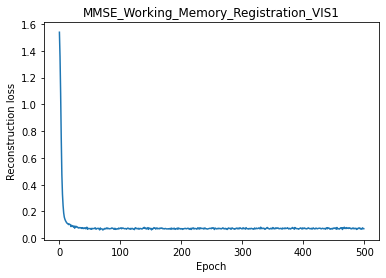

In [29]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
for f in files:
    opts=dict(best_hyper[best_hyper['files'].copy()==f])
    settings=set_settings(opts,modload=False,save=True)
    helpers.train_network(settings)
wave = np.sin(2*np.pi*400*np.arange(10000*2)/10000)
Audio(wave, rate=10000, autoplay=True)

# Get embeddings

In [30]:
dat=list()
dfs=list()
for f in files:
    # replace placeholders in template
    opts=dict(best_hyper[best_hyper['files'].copy()==f])
    opts['nbatch'].iloc[0]=sample_size
    settings=set_settings(opts,nepochs=1,modload=True,save=False)
    
    #run
    encs,encz,d=helpers.enc_network(settings)

    # make deterministic embeddings
    subj=pd.read_csv('python_names_Notmissing/'+re.sub('.csv','',f)+'_subj.csv')['x']
    sc=pd.DataFrame({'scode_'+re.sub('.csv','',f):pd.Series(np.array([i for i in encs])),'SUBJID':subj})  
    zc=pd.DataFrame({'zcode_'+re.sub('.csv','',f):pd.Series(np.array([i[0] for i in encz])),'SUBJID':subj})
    ##change by Meemansa for ALTOIDA version 4(duplicate IDs for some patients)
    #enc=pd.merge(sc, zc, on = 'SUBJID')
    enc=pd.concat([sc, zc], axis=1)
    enc = enc.iloc[:, :-1]
    ##end of change
    
    
    # save out individual file's metadata
    enc.to_csv('Saved_Networks/'+re.sub('.csv','',f)+'_meta.csv',index = False)
    dfs.append(enc)
    dat.append(d)

# join metadata
enc_vars=[pd.read_csv('Saved_Networks/'+re.sub('.csv','',f)+'_meta.csv') for f in files]
meta=helpers.merge_dat(enc_vars)
meta[meta.columns[['Unnamed' not in i for i in meta.columns]]].to_csv('metaenc_nm.csv',index= False)

dat_dic=dict(zip(files,dat))



/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


hrhffhfhfhf
argvals
['--epochs', '1', '--model_name', 'model_HIVAE_inputDropout', '--restore', '1', '--data_file', 'data_python_NotMissing/MMSE_Attention_Concentration_VIS1.csv', '--types_file', 'data_python_NotMissing/MMSE_Attention_Concentration_VIS1_types.csv', '--batch_size', '1445', '--save', '2', '--save_file', 'MMSE_Attention_Concentration_VIS1', '--dim_latent_s', '1', '--dim_latent_z', '1', '--dim_latent_y', '1', '--learning_rate', '0.001']
args
Namespace(batch_size=1445, data_file='data_python_NotMissing/MMSE_Attention_Concentration_VIS1.csv', dim_latent_s=1, dim_latent_y=1, dim_latent_y_partition=None, dim_latent_z=1, display=1, epochs=1, learning_rate=0.001, miss_file='Missing_test.csv', miss_percentage_test=0.0, miss_percentage_train=0.0, model_name='model_HIVAE_inputDropout', perp=10, plot=1, restore=1, save=2, save_file='MMSE_Attention_Concentration_VIS1', true_miss_file=None, types_file='data_python_NotMissing/MMSE_Attention_Concentration_VIS1_types.csv')
[*] Importing m

/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


[*] Defining Cost function...
batch size
1445
n_batches
1
INFO:tensorflow:Restoring parameters from ./Saved_Networks/MMSE_Language_VIS1/MMSE_Language_VIS1.ckpt
Model restored: ./Saved_Networks/MMSE_Language_VIS1/MMSE_Language_VIS1.ckpt
Number of cols
1
minimum
4
maximum
9
params
[{'s': array([[ 4.8000293, -4.6797376],
       [ 3.3123102, -3.1685822],
       [-4.2268314,  4.300971 ],
       ...,
       [-4.2268314,  4.300971 ],
       [ 3.3123102, -3.1685822],
       [-4.2268314,  4.300971 ]], dtype=float32), 'z': [array([[ -0.69850504],
       [ -1.9487773 ],
       [-10.335737  ],
       ...,
       [-10.335737  ],
       [ -1.9487773 ],
       [-10.335737  ]], dtype=float32), array([[-0.82648605],
       [-0.37831974],
       [-0.01188155],
       ...,
       [-0.01188155],
       [-0.37831974],
       [-0.01188155]], dtype=float32)]}]
keys
dict_keys(['s', 'z'])
hrhffhfhfhf
argvals
['--epochs', '1', '--model_name', 'model_HIVAE_inputDropout', '--restore', '1', '--data_file', 'data_py

/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


[*] Defining Cost function...
batch size
1445
n_batches
1
INFO:tensorflow:Restoring parameters from ./Saved_Networks/MMSE_Memory_Recall_VIS1/MMSE_Memory_Recall_VIS1.ckpt
Model restored: ./Saved_Networks/MMSE_Memory_Recall_VIS1/MMSE_Memory_Recall_VIS1.ckpt
Number of cols
1
minimum
0
maximum
3
params
[{'s': array([[ 5.3437138, -5.7630577],
       [ 5.3437138, -5.7630577],
       [ 5.3437138, -5.7630577],
       ...,
       [ 5.3437138, -5.7630577],
       [-4.1789136,  3.82332  ],
       [ 5.3437138, -5.7630577]], dtype=float32), 'z': [array([[-16.990568 ],
       [-16.990568 ],
       [-16.990568 ],
       ...,
       [-16.990568 ],
       [  1.0462124],
       [-16.990568 ]], dtype=float32), array([[-0.01218304],
       [-0.01218304],
       [-0.01218304],
       ...,
       [-0.01218304],
       [-0.08783336],
       [-0.01218304]], dtype=float32)]}]
keys
dict_keys(['s', 'z'])
hrhffhfhfhf
argvals
['--epochs', '1', '--model_name', 'model_HIVAE_inputDropout', '--restore', '1', '--data_f

/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


[*] Defining Cost function...
batch size
1445
n_batches
1
INFO:tensorflow:Restoring parameters from ./Saved_Networks/MMSE_Orientation_VIS1/MMSE_Orientation_VIS1.ckpt
Model restored: ./Saved_Networks/MMSE_Orientation_VIS1/MMSE_Orientation_VIS1.ckpt
Number of cols
1
minimum
4
maximum
10
params
[{'s': array([[-3.1621995,  3.5818896],
       [-3.1621995,  3.5818896],
       [-3.1621995,  3.5818896],
       ...,
       [-3.1621995,  3.5818896],
       [ 5.597858 , -5.107729 ],
       [ 3.5154338, -3.0128179]], dtype=float32), 'z': [array([[8.774607  ],
       [8.774607  ],
       [8.774607  ],
       ...,
       [8.774607  ],
       [0.41848648],
       [1.3540435 ]], dtype=float32), array([[ 0.00277656],
       [ 0.00277656],
       [ 0.00277656],
       ...,
       [ 0.00277656],
       [-1.1405779 ],
       [-0.61837786]], dtype=float32)]}]
keys
dict_keys(['s', 'z'])
hrhffhfhfhf
argvals
['--epochs', '1', '--model_name', 'model_HIVAE_inputDropout', '--restore', '1', '--data_file', 'data_p

/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


[*] Defining Cost function...
batch size
1445
n_batches
1
INFO:tensorflow:Restoring parameters from ./Saved_Networks/MMSE_Working_Memory_Registration_VIS1/MMSE_Working_Memory_Registration_VIS1.ckpt
Model restored: ./Saved_Networks/MMSE_Working_Memory_Registration_VIS1/MMSE_Working_Memory_Registration_VIS1.ckpt
Number of cols
1
minimum
1
maximum
3
params
[{'s': array([[0.10571884],
       [0.10571884],
       [0.10571884],
       ...,
       [0.10571884],
       [0.10571884],
       [0.10571884]], dtype=float32), 'z': [array([[3.6318834],
       [3.6318834],
       [3.6318834],
       ...,
       [3.6318834],
       [3.6318834],
       [3.6318834]], dtype=float32), array([[-0.01740471],
       [-0.01740471],
       [-0.01740471],
       ...,
       [-0.01740471],
       [-0.01740471],
       [-0.01740471]], dtype=float32)]}]
keys
dict_keys(['s', 'z'])


In [31]:
meta = pd.read_csv("metaenc_nm.csv", sep = ',')
meta

,scode_MMSE_Attention_Concentration_VIS1,SUBJID,zcode_MMSE_Attention_Concentration_VIS1,scode_MMSE_Language_VIS1,zcode_MMSE_Language_VIS1,scode_MMSE_Memory_Recall_VIS1,zcode_MMSE_Memory_Recall_VIS1,scode_MMSE_Orientation_VIS1,zcode_MMSE_Orientation_VIS1,scode_MMSE_Working_Memory_Registration_VIS1,zcode_MMSE_Working_Memory_Registration_VIS1
0,0,002_S_0295,-3.382766,0,-0.698505,0,-16.990568,1,8.774607,0,3.631883
1,0,002_S_0413,-3.382766,0,-1.948777,0,-16.990568,1,8.774607,0,3.631883
2,0,002_S_0559,-3.382766,1,-10.335737,0,-16.990568,1,8.774607,0,3.631883
3,0,002_S_0619,-3.382766,1,-10.335737,1,2.121368,0,-0.696185,0,3.631883
4,0,002_S_0685,-3.382766,1,-10.335737,0,-16.990568,1,8.774607,0,3.631883
...,...,...,...,...,...,...,...,...,...,...,...
1440,0,941_S_4377,-3.382766,0,-1.948777,0,-16.990568,1,8.774607,0,3.631883
1441,0,941_S_4420,-2.850877,0,-1.948777,0,-16.990568,1,8.774607,0,3.631883
1442,0,941_S_4764,-3.382766,1,-10.335737,0,-16.990568,1,8.774607,0,3.631883
1443,0,941_S_5124,-3.382766,0,-1.948777,1,1.046212,0,0.418486,0,3.631883


Text(0.5, 0.98, 'HI-VAE embeddings (deterministic)')

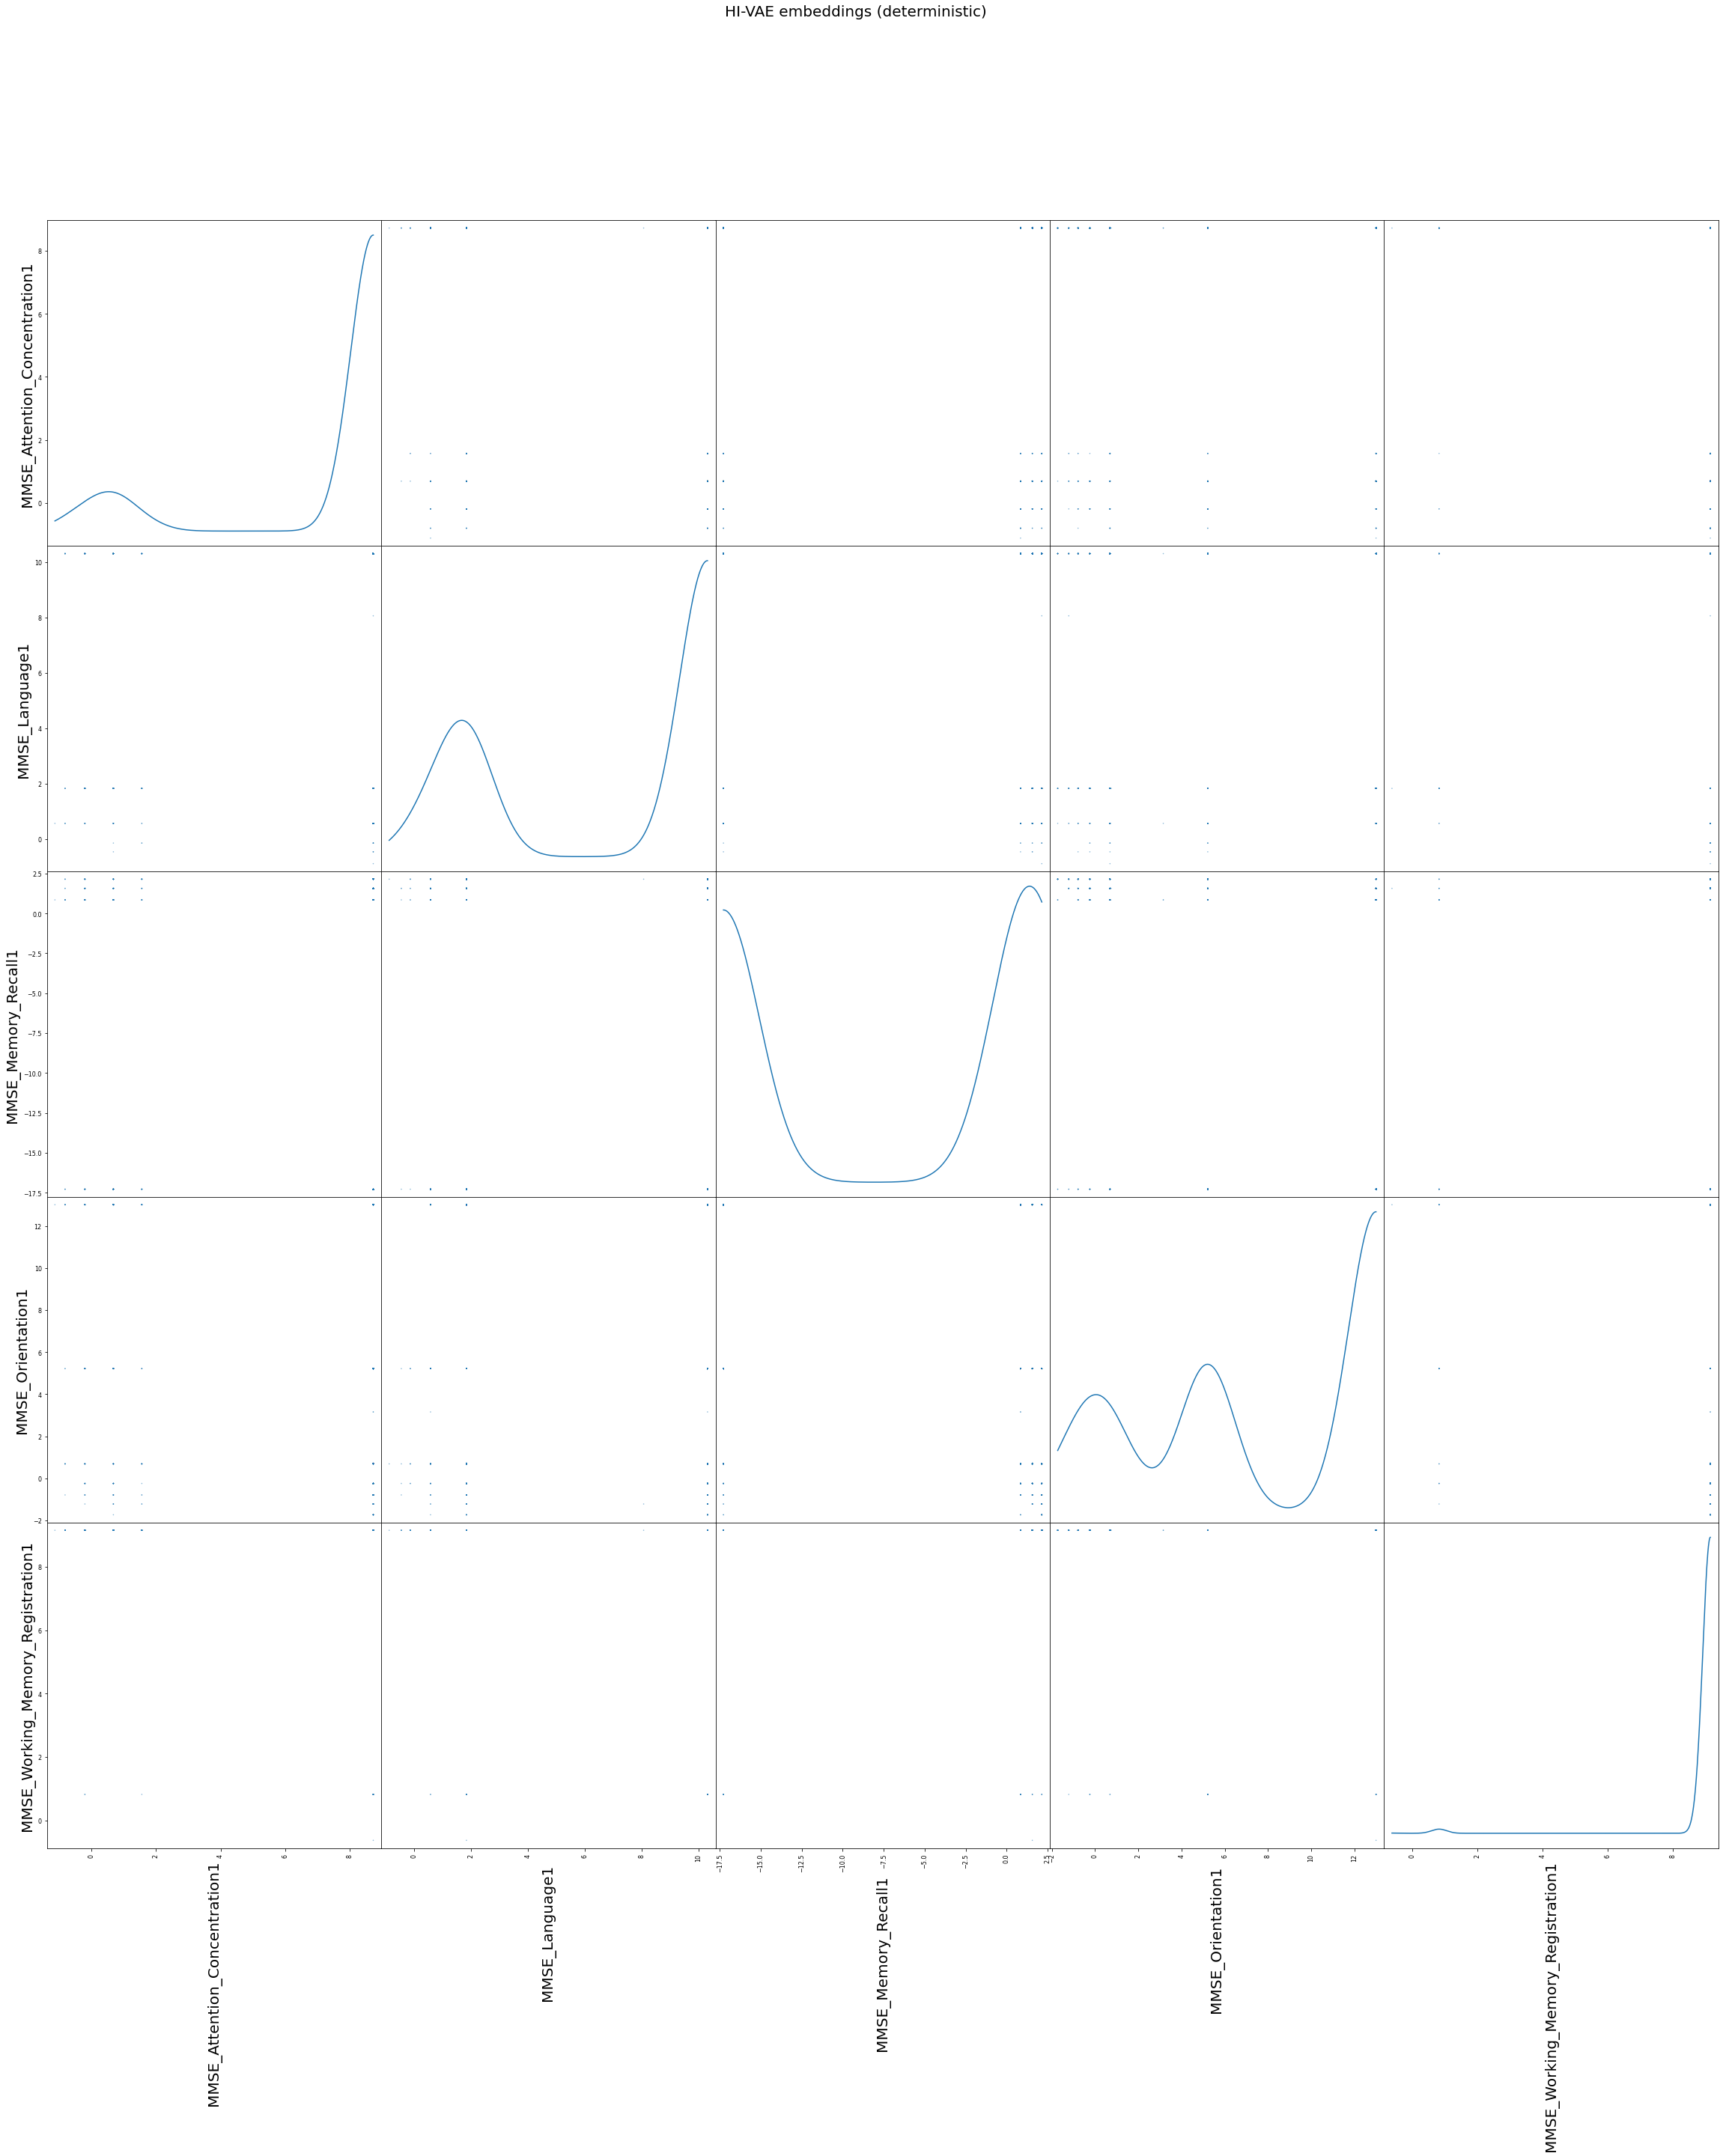

In [19]:
fig = scatter_matrix(
    meta[meta.columns.drop(list(meta.filter(regex='SUBJID|scode_')))],
    figsize  = [40, 40],
    marker   = ".",
    s        = 10,
    diagonal = "kde"
)
for ax in fig.ravel():
    ax.set_xlabel(re.sub('_VIS|zcode_','',ax.get_xlabel()), fontsize = 20, rotation = 90)
    ax.set_ylabel(re.sub('_VIS|zcode_','',ax.get_ylabel()), fontsize = 20, rotation = 90)
    
plt.suptitle('HI-VAE embeddings (deterministic)',fontsize=20)

# RP decoding (Reconstruction)

In [32]:
meta = pd.read_csv('metaenc_nm.csv')
sample_size = len(file)
recon=list()
recdfs=list()
for f in files:
    # replace placeholders in template
    opts=dict(best_hyper[best_hyper['files'].copy()==f])
    opts['nbatch'].iloc[0]=sample_size
    settings=set_settings(opts,nepochs=1,modload=True,save=False)
    
    #run
    zcodes=meta['zcode_'+re.sub('.csv','',f)]
    scodes=meta['scode_'+re.sub('.csv','',f)]
    rec=helpers.dec_network(settings,zcodes,scodes)
    recon.append(rec)
    
    subj=pd.read_csv('python_names_Notmissing/'+re.sub('.csv','',f)+'_subj.csv')['x']
    names=pd.read_csv('python_names_Notmissing/'+re.sub('.csv','',f)+'_cols.csv')['x']
    recd=pd.DataFrame(rec)
    recd.columns=names
    recd['SUBJID']=subj
    recdfs.append(recd)
    
recon_dic=dict(zip(files,recon))

data_recon=helpers.merge_dat(recdfs)
data_recon.to_csv('reconRP_nm.csv',index=False)

/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


[*] Importing model: model_HIVAE_inputDropout
[*] Defining placeholders
[*] Defining Encoder...
[*] Defining Decoder...
[*] Defining Cost function...
INFO:tensorflow:Restoring parameters from ./Saved_Networks/MMSE_Attention_Concentration_VIS1/MMSE_Attention_Concentration_VIS1.ckpt
Model restored: ./Saved_Networks/MMSE_Attention_Concentration_VIS1/MMSE_Attention_Concentration_VIS1.ckpt
::::::DECODING:::::::::
Number of cols
1
minimum
0
maximum
5
[*] Importing model: model_HIVAE_inputDropout
[*] Defining placeholders
[*] Defining Encoder...
[*] Defining Decoder...
[*] Defining Cost function...


/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


INFO:tensorflow:Restoring parameters from ./Saved_Networks/MMSE_Language_VIS1/MMSE_Language_VIS1.ckpt
Model restored: ./Saved_Networks/MMSE_Language_VIS1/MMSE_Language_VIS1.ckpt
::::::DECODING:::::::::
Number of cols
1
minimum
4
maximum
9
[*] Importing model: model_HIVAE_inputDropout
[*] Defining placeholders
[*] Defining Encoder...
[*] Defining Decoder...
[*] Defining Cost function...


/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


INFO:tensorflow:Restoring parameters from ./Saved_Networks/MMSE_Memory_Recall_VIS1/MMSE_Memory_Recall_VIS1.ckpt
Model restored: ./Saved_Networks/MMSE_Memory_Recall_VIS1/MMSE_Memory_Recall_VIS1.ckpt
::::::DECODING:::::::::
Number of cols
1
minimum
0
maximum
3
[*] Importing model: model_HIVAE_inputDropout
[*] Defining placeholders
[*] Defining Encoder...
[*] Defining Decoder...
[*] Defining Cost function...


/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


INFO:tensorflow:Restoring parameters from ./Saved_Networks/MMSE_Orientation_VIS1/MMSE_Orientation_VIS1.ckpt
Model restored: ./Saved_Networks/MMSE_Orientation_VIS1/MMSE_Orientation_VIS1.ckpt
::::::DECODING:::::::::
Number of cols
1
minimum
4
maximum
10
[*] Importing model: model_HIVAE_inputDropout
[*] Defining placeholders
[*] Defining Encoder...
[*] Defining Decoder...
[*] Defining Cost function...


/Users/meemansasood/Library/Python/3.7/lib/python/site-packages/pandas/core/indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


INFO:tensorflow:Restoring parameters from ./Saved_Networks/MMSE_Working_Memory_Registration_VIS1/MMSE_Working_Memory_Registration_VIS1.ckpt
Model restored: ./Saved_Networks/MMSE_Working_Memory_Registration_VIS1/MMSE_Working_Memory_Registration_VIS1.ckpt
::::::DECODING:::::::::
Number of cols
1
minimum
1
maximum
3
